In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
data=pd.read_csv('car_age_price.csv')


check the basic details of dataset

In [26]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [27]:
data.shape

(112, 2)

In [28]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [30]:
data.isna().sum()

Year     0
Price    0
dtype: int64

*there is no null value in the dataset*

In [31]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [ ]:
# there is no need for dataset oulierhandling

year vs price

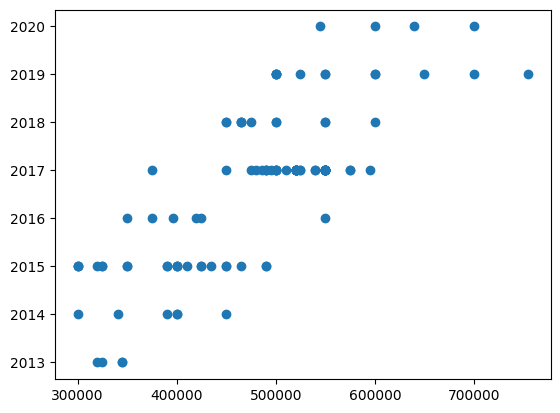

In [ ]:
plt.scatter(data['Price'],data['Year'])

find the best Linear Relationship between year and price

In [ ]:
#split the data into x and y

In [32]:
y=data['Price']
X=data.drop(['Price'],axis=1)

In [ ]:
X

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [ ]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [ ]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [ ]:
X_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [34]:
from sklearn import linear_model

In [35]:
lr=linear_model.LinearRegression()

In [36]:
model=lr.fit(X_train,y_train)

In [37]:
prediction=model.predict(X_test)

In [13]:
X_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [ ]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [38]:
prediction

array([600775.91252081, 505558.77690466, 553167.34471273, 553167.34471273,
       553167.34471273, 410341.6412885 , 505558.77690466, 553167.34471273,
       600775.91252081, 600775.91252081, 315124.50567235, 505558.77690466,
       410341.6412885 , 648384.48032889, 553167.34471273, 600775.91252081,
       315124.50567235, 410341.6412885 , 505558.77690466, 505558.77690466,
       505558.77690466, 505558.77690466, 505558.77690466])

In [39]:
model.predict([[2022]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([743601.61594504])

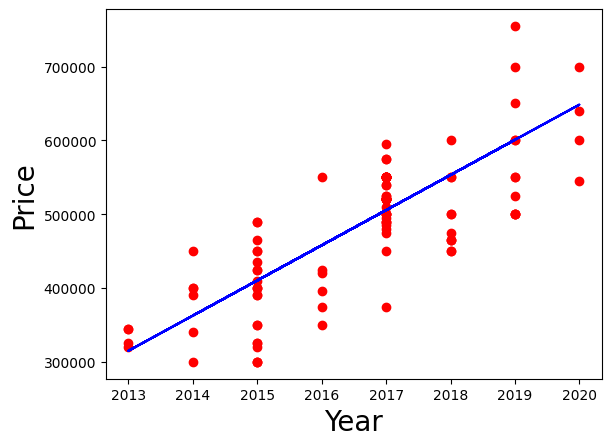

In [40]:
plt.xlabel('Year',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.scatter(data.Year,data.Price,color='red')
plt.plot(data.Year,model.predict(data[['Year']]),color='blue')

In [41]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE is :\n',mean_squared_error(y_test,prediction))

MSE is :
 4326906256.829671


In [42]:
print('R2 scre is:\n',r2_score(y_test,prediction))

R2 scre is:
 0.36759313425902185


In [44]:
from  sklearn.preprocessing  import  MinMaxScaler
minmax = MinMaxScaler()
X= minmax.fit_transform(X)
type(X)

numpy.ndarray

In [45]:
from pandas.core.frame import DataFrame

X=DataFrame(X)

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE is :\n',mean_squared_error(y_test,prediction))
print('R2 scre is:\n',r2_score(y_test,prediction))

MSE is :
 4326906256.830066
R2 scre is:
 0.3675931342589642


In [47]:
data=pd.read_csv('car_age_price.csv')
data2=data

Standard Scaling


In [48]:

from sklearn.preprocessing import StandardScaler
y=data2['Price']
X=data2.drop(['Price'],axis=1)


In [49]:
std=StandardScaler()
X=std.fit_transform(X)
X=pd.DataFrame(X)

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSE is :\n',mean_squared_error(y_test,prediction))
print('R2 scre is:\n',r2_score(y_test,prediction))

MSE is :
 4326906256.829966
R2 scre is:
 0.36759313425897877


In [51]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [52]:
lasso_reg.score(X_train,y_train)

0.6389351102119747

In [53]:
lasso_reg.score(X_test,y_test)

0.3681436929720535

In [ ]:
#accuracy score is improved

In [54]:
y_pred_lasso=lasso_reg.predict(X_train)
y_pred_lasso=lasso_reg.predict(X_test)

In [55]:
print('MSE is :\n',mean_squared_error(y_test,y_pred_lasso))

MSE is :
 4323139352.848676


In [56]:
from sklearn import linear_model
ridg_reg=linear_model.Ridge(alpha=1.0,max_iter=None,tol=0.1)
ridg_reg=ridg_reg.fit(X_train,y_train)

In [ ]:
ridg_reg.score(X_train,y_train)

0.6388427557382134

In [ ]:
ridg_reg.score(X_test,y_test)

0.3768761292688838

In [ ]:
y_pred_ridge=ridg_reg.predict(X_train)
y_pred_ridge=ridg_reg.predict(X_test)

In [ ]:
print('MSE is :\n',mean_squared_error(y_test,y_pred_ridge))

MSE is :
 4263392320.8397


In [ ]:
#comparing lasso regression and linear regression,lasso regression is perform better